In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
from folium.plugins import BeautifyIcon
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

## Câu 1:

Xây dựng hàm kiểm tra mảng đan xen chẵn lẻ def kiem_tra_mang_dan_xen_chan_le (arr) để kiểm tra mảng truyền vào có đan xen chẵn lẻ hay không. Kết quả trả về True nếu mảng đan xen chẵn lẻ, ngược lại trả về False. (0.5 điểm)

In [24]:
def kiem_tra_mang_dan_xen_chan_le (arr):
    n = len(arr)
    for i in range(n-1):
        if (arr[i] % 2 == 0) & (arr[i+1] % 2 != 0):
            flag = True
        elif (arr[i] % 2 != 0)& (arr[i+1] % 2 == 0):
            flag = True
        else:
            flag = False
    return flag
            

In [7]:
array = np.random.randint(1,100,[4,4])
array

array([[96, 56, 67, 91],
       [ 8, 63, 68,  8],
       [40, 61, 18, 86],
       [83, 43, 30, 40]])

In [29]:
arr = []
for i in range(4):
    arr.append(array[i,i])
print(arr)

[96, 63, 18, 40]


In [30]:
kiem_tra_mang_dan_xen_chan_le (arr)

False

## Câu 2:

Cho dữ liệu prog_book.csv thực hiện các yêu cầu sau :
1. Đọc dữ liệu và tạo đoạn text từ cột Book_title. Sau đó thực hiện chuẩn hóa đoạn text (loại bỏ các từ không quan trọng như of, a ,the,as... ) (0.5 điểm)

In [40]:
data = pd.read_csv('prog_book.csv')
df = pd.DataFrame(data)
print(df.shape)
df.head()

(271, 7)


,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,"3,829",The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,"1,658",Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,"1,325",How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706


In [38]:
df.tail()

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
266,3.76,0,3D Game Engine Architecture: Engineering Real-...,Dave Eberly's 3D Game Engine Design was the fi...,752,Hardcover,203.108823
267,3.94,22,An Introduction to Database Systems,"Continuing in the eighth edition, An Introduct...",1040,Paperback,212.097059
268,4.49,36,"The Art of Computer Programming, Volumes 1-3 B...",Knuth's classic work has been widely acclaimed...,896,Boxed Set - Hardcover,220.385294
269,4.77,4,"The Art of Computer Programming, Volumes 1-4a ...","""The bible of all fundamental algorithms and t...",3168,Hardcover,220.385294
270,3.84,5,A Discipline for Software Engineering,Designed to help individual programmers develo...,789,Hardcover,235.650000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           271 non-null    float64
 1   Reviews          271 non-null    object 
 2   Book_title       271 non-null    object 
 3   Description      271 non-null    object 
 4   Number_Of_Pages  271 non-null    int64  
 5   Type             271 non-null    object 
 6   Price            271 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.9+ KB


In [53]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [41]:
df['Book_title'].head(20)

0                                 The Elements of Style
1         The Information: A History, a Theory, a Flood
2          Responsive Web Design Overview For Beginners
3     Ghost in the Wires: My Adventures as the World...
4                                      How Google Works
5                                      The Meme Machine
6     Start with Why: How Great Leaders Inspire Ever...
7     Algorithms to Live By: The Computer Science of...
8     Weapons of Math Destruction: How Big Data Incr...
9     ZX Spectrum Games Code Club: Twenty fun games ...
10      Sync: The Emerging Science of Spontaneous Order
11    The Master Algorithm: How the Quest for the Ul...
12                                             Ship It!
13        Superintelligence: Paths, Dangers, Strategies
14    The Art of the Start: The Time-Tested, Battle-...
15    Kingpin: How One Hacker Took Over the Billion-...
16    The Quark and the Jaguar: Adventures in the Si...
17    Linked: How Everything Is Connected to Eve

In [44]:
stopwords = set(STOPWORDS) 
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [45]:
comment_words =' '.join(df['Book_title'])

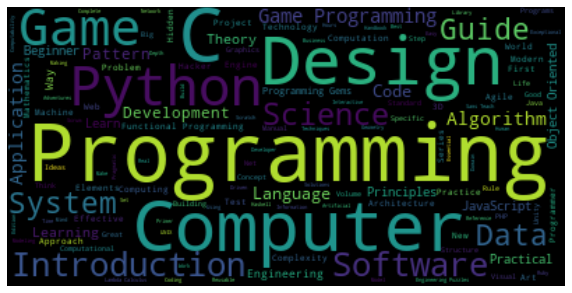

In [46]:
# Vẽ WordClouds cho dữ liệu này
wc = WordCloud(
    background_color='black',
    stopwords=stopwords
)

# generate the word cloud
wc.generate(comment_words)

# display the word clouds
plt.figure(figsize=(10, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

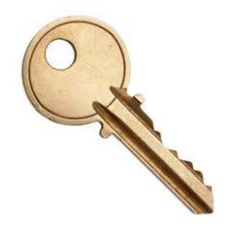

In [48]:
wc_mask = np.array(Image.open('chiakhoa.jpg'))

plt.imshow(wc_mask, interpolation='bilinear')
plt.axis('off')
plt.show()

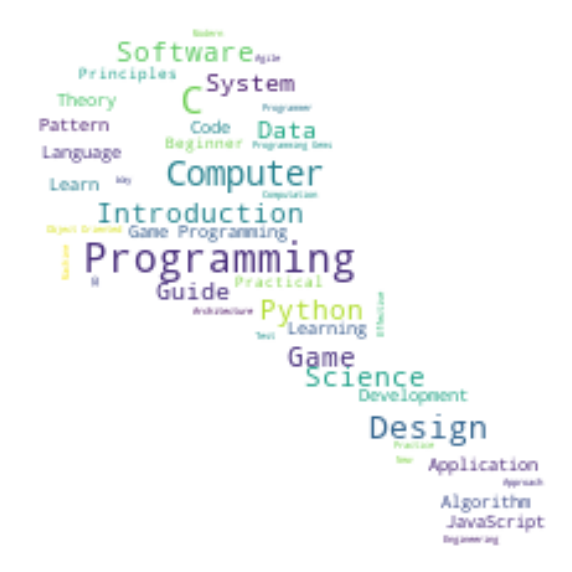

In [50]:
wc1 = WordCloud(background_color='white', max_words=1000, 
                mask=wc_mask, stopwords=stopwords)

wc1.generate(comment_words)

plt.figure(figsize=(10, 12))
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

## Câu 3:

In [57]:
data = pd.read_csv('supermarket_sales.csv')
df = pd.DataFrame(data)
print(df.shape)
df.head()

(1000, 17)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [55]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [58]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [59]:
df.isnull().all()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

Dữ liệu không có cột nào có giá trị null, nan, na.

In [62]:
df.Date = pd.to_datetime(df.Date)
df.Date

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [75]:
df['weekday'] = df.Date.dt.day_name()
print(df.shape)
df.head()

(1000, 18)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday


Thêm cột ‘month_name’ thể hiện các thứ trong tuần dựa trên cột ‘Date’. (Gợi ý sử dụng hàm month_name trong Series của pandas) (0.25 điểm)

In [78]:
df['month_name'] = df.Date.dt.month_name()
print(df.shape)
df.head()

(1000, 19)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,month_name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February


In [79]:
df['month_name'].unique()

array(['January', 'March', 'February'], dtype=object)

In [88]:
transaction = df.groupby('month_name').Quantity.sum()
transaction

month_name
February    1654
January     1965
March       1891
Name: Quantity, dtype: int64

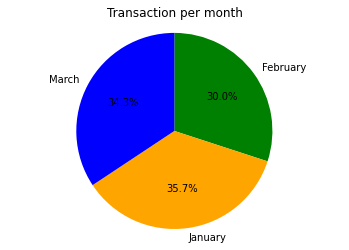

In [92]:
plt.pie(transaction, labels = ['February', 'January', 'March'],  colors = ['green','orange','blue'],  startangle = 90, autopct = '%1.1f%%',counterclock=False)

plt.axis('equal')

# Thiết lập title là Sex Proportion
plt.title("Transaction per month")

# Show the plot
plt.show()

* Nhận xét: Các tháng có lượng giao dịch tương đối đồng đều

In [119]:
count = df.groupby('Product line').Quantity.count()
count.index

Index(['Electronic accessories', 'Fashion accessories', 'Food and beverages',
       'Health and beauty', 'Home and lifestyle', 'Sports and travel'],
      dtype='object', name='Product line')

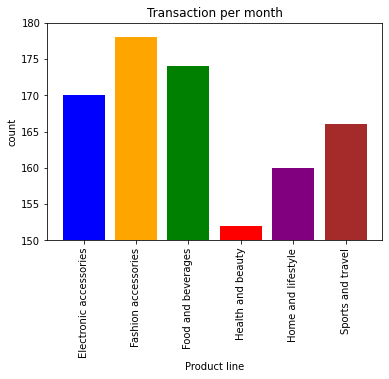

In [133]:
c = ['blue', 'orange','green','red', 'purple', 'brown']
plt.bar(count.index, count.values, color = c)

# Thiết lập title và labels, xsticks (rotation='vertical')
plt.xlabel('Product line')
plt.ylabel('count')
plt.title('Transaction per month')
plt.xticks(count.index.values, count.index.values, rotation='vertical')
plt.ylim(150,180)

# Hiển thị biểu đồ
plt.show()

* Nhận xét: Biểu đồ so sánh tổng lượng giao dịch giữa các ngành. Ta thấy Fashion accessories là cao nhất, Health and beauty cho kết quả thấp nhất. Tổng giao dịch ở các ngành ở khoảng từ 150 -180.

In [135]:
sum_hd = df.groupby('month_name').Total.sum()
sum_hd

month_name
February     97219.374
January     116291.868
March       109455.507
Name: Total, dtype: float64

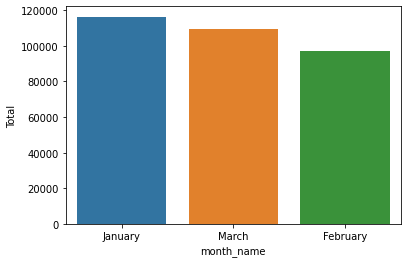

In [139]:
sns.barplot(x='month_name',y='Total',data=df,estimator=sum,ci=0)
plt.show()

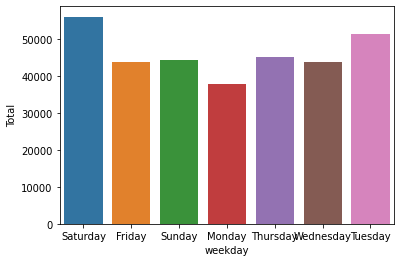

In [141]:
sns.barplot(x='weekday',y='Total',data=df,estimator=sum,ci=0)
plt.show()

* Nhận xét: Ta thấy tổng giao dịch cao nhất ở ngày chủ nhật và thấp nhất vào thứ hai.

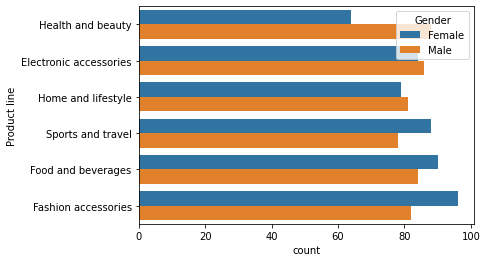

In [142]:
sns.countplot(data=df, y="Product line", hue="Gender")
plt.show()

* Nhận xét: Ở 3 ngành đầu tiên, giao dịch ở nam thấp hơn nữ, ở 3 ngành sau, giao dịch ở nữ thấp hơn nam. 

Vẽ biểu đồ thể hiện tần suất giao dịch mỗi ngày như hình gợi ý. Bạn có nhận xét gì về biểu đồ. (0.25điểm)

<Figure size 1080x1440 with 0 Axes>

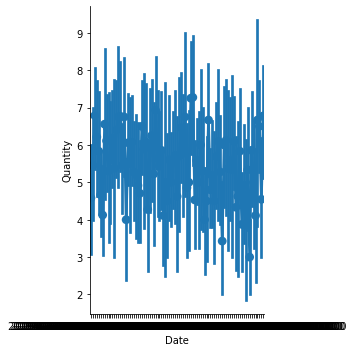

In [152]:
plt.figure(figsize=(15,20))
sns.catplot(data=df, x='Date', y='Quantity', kind='point')


Tạo dataframe mới với các cột ['Total', 'Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Rating'] trong dataframe ban đầu. Vẽ biểu đồ như hình gợi ý và nhận xét.(0.5 điểm)

In [153]:
newdf = df[['Total', 'Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Rating']]
newdf

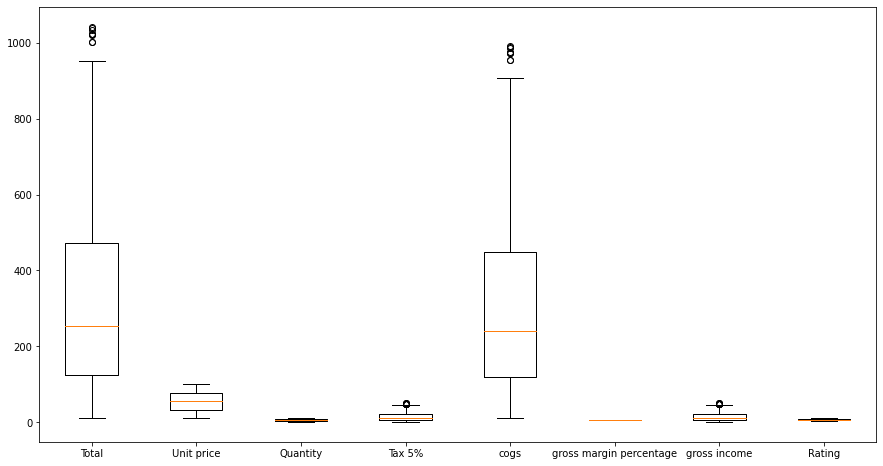

In [160]:
plt.figure(figsize=(15,8))
height = plt.boxplot(newdf,labels=['Total', 'Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Rating'])

* Nhận xét: Total và cogs có giá trị trung bình cao, phương sai lớn, khoảng tứ phương vị trải rộng. Total, Tax, cogs, gross income có upper outliers.

In [178]:
Q1_Total = newdf.Total.quantile(0.25)
Q3_Total = newdf.Total.quantile(0.75)
IQR_Total = Q3_Total - Q1_Total
IQR_Total

342.4995

In [179]:
Total_upper_bound = Q3_Total + (1.5 * IQR_Total) 
Total_upper_bound

978.4162500000001

In [180]:
Q1_Tax = newdf['Tax 5%'].quantile(0.25)
Q3_Tax = newdf['Tax 5%'].quantile(0.75)
IQR_Tax = Q3_Tax - Q1_Tax
IQR_Tax

16.309500000000003

In [181]:
Tax_upper_bound = Q3_Tax + (1.5 * IQR_Tax) 
Tax_upper_bound

46.59125000000001

In [185]:
newdf = newdf.drop(newdf[newdf.Total > Total_upper_bound].index)
newdf = newdf.drop(newdf[newdf['Tax 5%'] > Tax_upper_bound].index)
newdf.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,month_name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February


## Câu 4:

In [201]:
data = pd.read_csv('World_Power_Consumption.csv',index_col = 0)
df = pd.DataFrame(data)
df.head()

,Text
0,"China 5,523,000,000,000"
1,"United 3,832,000,000,000"
2,"European 2,771,000,000,000"
3,"Russia 1,065,000,000,000"
4,"Japan 921,000,000,000"


In [202]:
df.tail()

,Text
214,"Saint 7,440,000"
215,"Niue 2,790,000"
216,"Gaza 202,000"
217,"Malta 174,700"
218,"Northern 48,300"


In [203]:
df.describe()

,Text
count,219
unique,219
top,"China 5,523,000,000,000"
freq,1


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 218
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    219 non-null    object
dtypes: object(1)
memory usage: 3.4+ KB


In [206]:
df['Country'] = df.Text.str.extract('([a-zA-Z]+)')

,Text,Country
0,"China 5,523,000,000,000",China
1,"United 3,832,000,000,000",United
2,"European 2,771,000,000,000",European
3,"Russia 1,065,000,000,000",Russia
4,"Japan 921,000,000,000",Japan
...,...,...
214,"Saint 7,440,000",Saint
215,"Niue 2,790,000",Niue
216,"Gaza 202,000",Gaza
217,"Malta 174,700",Malta


In [219]:
df['Power_Consumption'] = df.Text.str.extract('\w+(.*)')
df

,Text,Country,Power_Consumption
0,"China 5,523,000,000,000",China,"5,523,000,000,000"
1,"United 3,832,000,000,000",United,"3,832,000,000,000"
2,"European 2,771,000,000,000",European,"2,771,000,000,000"
3,"Russia 1,065,000,000,000",Russia,"1,065,000,000,000"
4,"Japan 921,000,000,000",Japan,"921,000,000,000"
...,...,...,...
214,"Saint 7,440,000",Saint,"7,440,000"
215,"Niue 2,790,000",Niue,"2,790,000"
216,"Gaza 202,000",Gaza,"202,000"
217,"Malta 174,700",Malta,"174,700"
